In [2]:
#Run first and restart the Runtime
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.6 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np

In [2]:
path = '/content/drive/MyDrive/Data Science Projects/Gold Price Analysis/data.csv'

In [3]:
df = pd.read_csv(path, index_col='date', parse_dates=True)
df

,price
date,
1950-01-01,34.730
1950-02-01,34.730
1950-03-01,34.730
1950-04-01,34.730
1950-05-01,34.730
...,...
2017-10-01,1280.677
2017-11-01,1283.189
2017-12-01,1265.674


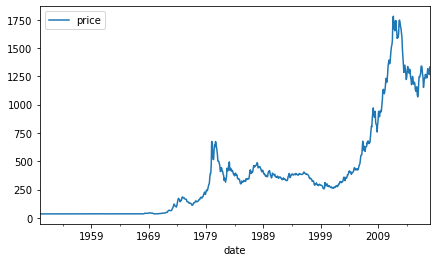

In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=(7,4))
df.plot()
plt.show()

In [5]:
start_date = '2009-01-01'
end_date = '2019-01-01'
mask = (df.index >= start_date) & (df.index <= end_date)
df_mask = df.loc[mask].copy()

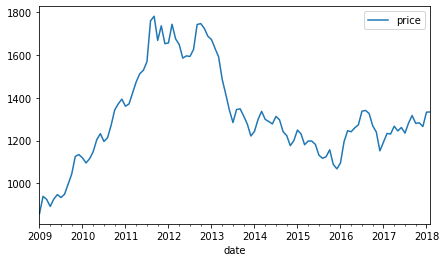

In [6]:
df_mask.index.freq='MS'
df_mask.plot()
plt.show()

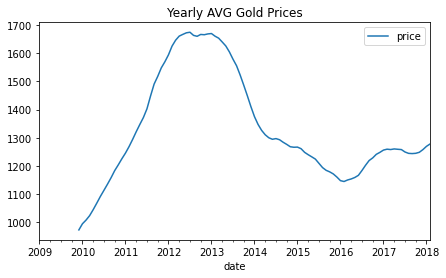

In [7]:
yearly = df_mask.rolling(window=12).mean()
yearly.plot()
plt.title('Yearly AVG Gold Prices')
plt.show()

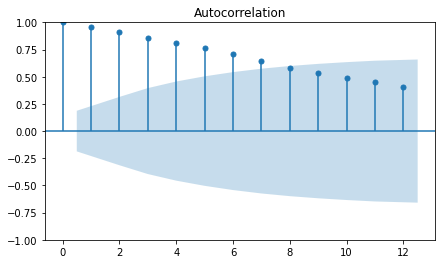

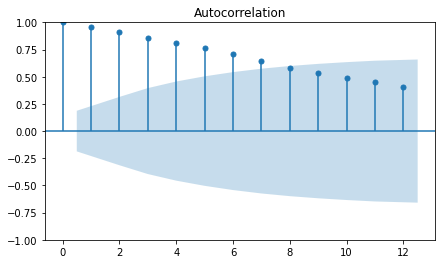

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
plot_acf(df_mask['price'], lags=12)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


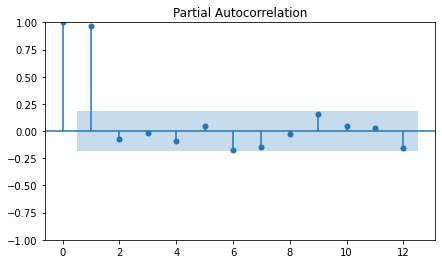

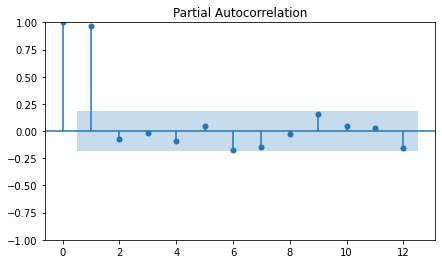

In [9]:
plot_pacf(df_mask['price'], lags=12)

In [10]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
  result = adfuller((series), autolag='AIC')
  labels = ['ADF Test Statistic', 'p value', '#lags used', '# observations']
  out = pd.Series(result[0:4], index=labels)
  print(out.to_string())
  if result [1]<= 0.05:
    print('Reject the null hypothesis')
    print('Data has not unit root and stationary')
  else:
    print('Fail to reject the null hypothesis')
    print('Data has a unit root and non-stationary')

In [11]:
adf_test(df_mask['price'])

ADF Test Statistic     -2.178778
p value                 0.214038
#lags used              5.000000
# observations        104.000000
Fail to reject the null hypothesis
Data has a unit root and non-stationary


In [21]:
from pmdarima import auto_arima

arima_fit = auto_arima(df['price'], start_P = 0, start_Q= 0, max_P = 10, max_Q= 10, seasonal= False, trace= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7473.359, Time=5.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7519.316, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7490.174, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7483.384, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7520.877, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7472.200, Time=1.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7480.323, Time=0.92 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7473.990, Time=1.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7479.049, Time=1.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7481.375, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7472.462, Time=0.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7473.918, Time=1.68 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7472.832, Time=0.74 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 15.868 seconds


In [26]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(df['price'], order=(1,1,2))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [27]:
model_result = model.fit()

In [28]:
fcast = model_result.predict(start = len(df), end=len(df)+24, typ=('levels'))
fcast = fcast.rename('ARIMA 1,0,1 Forecast')

<Axes: xlabel='date'>

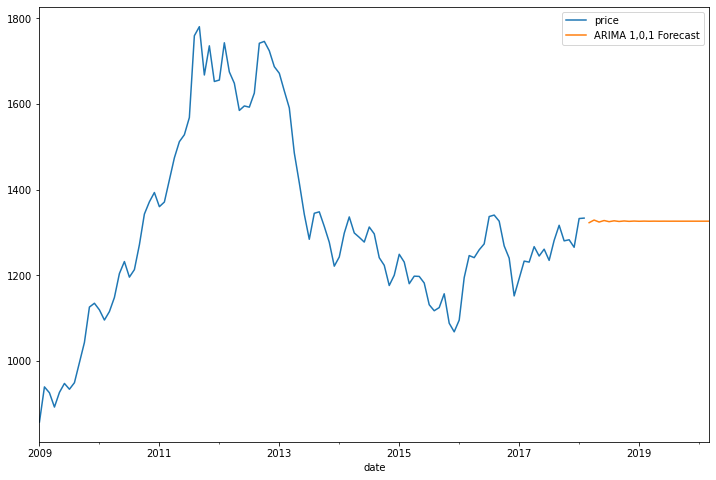

In [29]:
df_mask['price'].plot(figsize=(12,8), legend=True)
fcast.plot(legend=True)